In [1]:
import pandas as pd
import numpy as np
import os
from scipy.spatial import distance

In [2]:
df = pd.read_csv('/Users/naeemsunesara/Documents/GreyAtom/Classroom/dc_airbnb.csv')

In [3]:
df

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state
0,92%,91%,26,4,Entire home/apt,1.0,1.0,2.0,$160.00,$115.00,$100.00,1,1125,0,38.890046,-77.002808,Washington,20003,DC
1,90%,100%,1,6,Entire home/apt,3.0,3.0,3.0,$350.00,$100.00,NaN,2,30,65,38.880413,-76.990485,Washington,20003,DC
2,90%,100%,2,1,Private room,1.0,2.0,1.0,$50.00,NaN,NaN,2,1125,1,38.955291,-76.986006,Hyattsville,20782,MD
3,100%,NaN,1,2,Private room,1.0,1.0,1.0,$95.00,NaN,NaN,1,1125,0,38.872134,-77.019639,Washington,20024,DC
4,92%,67%,1,4,Entire home/apt,1.0,1.0,1.0,$50.00,$15.00,$450.00,7,1125,0,38.996382,-77.041541,Silver Spring,20910,MD
5,100%,100%,1,4,Entire home/apt,2.0,1.0,4.0,$99.00,NaN,NaN,1,1125,0,38.862486,-77.015062,Washington,20024,DC
6,100%,NaN,1,4,Entire home/apt,2.0,2.0,2.0,$100.00,$50.00,$150.00,3,1125,0,38.974738,-77.027076,Washington,20012,DC
7,100%,NaN,1,2,Entire home/apt,1.0,1.0,1.0,$100.00,NaN,NaN,1,1125,0,38.941486,-76.968485,Mount Rainier,20712,MD
8,94%,99%,8,2,Private room,1.0,1.5,1.0,$38.00,NaN,NaN,2,180,1,38.880105,-76.919031,Capitol Heights,20743,MD
9,100%,100%,9,2,Private room,1.0,NaN,1.0,$71.00,$10.00,NaN,2,365,4,38.975592,-77.010713,Takoma Park,20912,MD


In [4]:
df = df[['bathrooms','bedrooms','state','price','beds']]

In [5]:
df.head()

,bathrooms,bedrooms,state,price,beds
0,1.0,1.0,DC,$160.00,2.0
1,3.0,3.0,DC,$350.00,3.0
2,2.0,1.0,MD,$50.00,1.0
3,1.0,1.0,DC,$95.00,1.0
4,1.0,1.0,MD,$50.00,1.0


In [6]:
df['price'] = df['price'].str.replace('$','').str.replace(',','')
#df['price'].map(lambda x: x.strip('$,'))
#df.loc[:,'price'] = [x.strip('$') for x in df.price] 
#.str.replace(',','')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
df['price'] = df['price'].astype(float)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
df.head()

,bathrooms,bedrooms,state,price,beds
0,1.0,1.0,DC,160.0,2.0
1,3.0,3.0,DC,350.0,3.0
2,2.0,1.0,MD,50.0,1.0
3,1.0,1.0,DC,95.0,1.0
4,1.0,1.0,MD,50.0,1.0


In [9]:
df.dtypes

bathrooms    float64
bedrooms     float64
state         object
price        float64
beds         float64
dtype: object

In [10]:
df_state_oh = pd.get_dummies(df['state'])

In [11]:
df = pd.concat([df,df_state_oh],axis = 1)

In [12]:
df = df.drop('state',1)

In [13]:
#df_10 = 
df_10 = df.head(10)

In [14]:
df_10

,bathrooms,bedrooms,price,beds,DC,MD,NY,VA,Washington DC
0,1.0,1.0,160.0,2.0,1,0,0,0,0
1,3.0,3.0,350.0,3.0,1,0,0,0,0
2,2.0,1.0,50.0,1.0,0,1,0,0,0
3,1.0,1.0,95.0,1.0,1,0,0,0,0
4,1.0,1.0,50.0,1.0,0,1,0,0,0
5,1.0,2.0,99.0,4.0,1,0,0,0,0
6,2.0,2.0,100.0,2.0,1,0,0,0,0
7,1.0,1.0,100.0,1.0,0,1,0,0,0
8,1.5,1.0,38.0,1.0,0,1,0,0,0
9,NaN,1.0,71.0,1.0,0,1,0,0,0


In [15]:
test = pd.DataFrame(df.loc[10])

In [16]:
test = test.T

In [17]:
df_10['bathrooms'] = df_10['bathrooms'].fillna(df_10['bathrooms'].median())

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
df_10

,bathrooms,bedrooms,price,beds,DC,MD,NY,VA,Washington DC
0,1.0,1.0,160.0,2.0,1,0,0,0,0
1,3.0,3.0,350.0,3.0,1,0,0,0,0
2,2.0,1.0,50.0,1.0,0,1,0,0,0
3,1.0,1.0,95.0,1.0,1,0,0,0,0
4,1.0,1.0,50.0,1.0,0,1,0,0,0
5,1.0,2.0,99.0,4.0,1,0,0,0,0
6,2.0,2.0,100.0,2.0,1,0,0,0,0
7,1.0,1.0,100.0,1.0,0,1,0,0,0
8,1.5,1.0,38.0,1.0,0,1,0,0,0
9,1.0,1.0,71.0,1.0,0,1,0,0,0


In [19]:
df_10 = df_10.drop('price',1)

In [20]:
df_10

,bathrooms,bedrooms,beds,DC,MD,NY,VA,Washington DC
0,1.0,1.0,2.0,1,0,0,0,0
1,3.0,3.0,3.0,1,0,0,0,0
2,2.0,1.0,1.0,0,1,0,0,0
3,1.0,1.0,1.0,1,0,0,0,0
4,1.0,1.0,1.0,0,1,0,0,0
5,1.0,2.0,4.0,1,0,0,0,0
6,2.0,2.0,2.0,1,0,0,0,0
7,1.0,1.0,1.0,0,1,0,0,0
8,1.5,1.0,1.0,0,1,0,0,0
9,1.0,1.0,1.0,0,1,0,0,0


In [21]:
test = test.drop('price',1)

In [22]:
test

,bathrooms,bedrooms,beds,DC,MD,NY,VA,Washington DC
10,1.5,2.0,2.0,0.0,1.0,0.0,0.0,0.0


In [23]:
dst = []
for l in range(df_10.shape[0]):
    d = distance.euclidean(df_10.iloc[l],test.iloc[0])
    dst.append(d)

In [24]:
df_10['EuclideanDist'] = pd.Series(dst)

In [25]:
df_10.sort_values('EuclideanDist')

,bathrooms,bedrooms,beds,DC,MD,NY,VA,Washington DC,EuclideanDist
8,1.5,1.0,1.0,0,1,0,0,0,1.414214
2,2.0,1.0,1.0,0,1,0,0,0,1.500000
4,1.0,1.0,1.0,0,1,0,0,0,1.500000
6,2.0,2.0,2.0,1,0,0,0,0,1.500000
7,1.0,1.0,1.0,0,1,0,0,0,1.500000
9,1.0,1.0,1.0,0,1,0,0,0,1.500000
0,1.0,1.0,2.0,1,0,0,0,0,1.802776
3,1.0,1.0,1.0,1,0,0,0,0,2.061553
1,3.0,3.0,3.0,1,0,0,0,0,2.500000
5,1.0,2.0,4.0,1,0,0,0,0,2.500000


In [26]:
df.head(10)

,bathrooms,bedrooms,price,beds,DC,MD,NY,VA,Washington DC
0,1.0,1.0,160.0,2.0,1,0,0,0,0
1,3.0,3.0,350.0,3.0,1,0,0,0,0
2,2.0,1.0,50.0,1.0,0,1,0,0,0
3,1.0,1.0,95.0,1.0,1,0,0,0,0
4,1.0,1.0,50.0,1.0,0,1,0,0,0
5,1.0,2.0,99.0,4.0,1,0,0,0,0
6,2.0,2.0,100.0,2.0,1,0,0,0,0
7,1.0,1.0,100.0,1.0,0,1,0,0,0
8,1.5,1.0,38.0,1.0,0,1,0,0,0
9,1.0,1.0,71.0,1.0,0,1,0,0,0


In [27]:
df_10['price'] = df['price']

In [28]:
df_10

,bathrooms,bedrooms,beds,DC,MD,NY,VA,Washington DC,EuclideanDist,price
0,1.0,1.0,2.0,1,0,0,0,0,1.802776,160.0
1,3.0,3.0,3.0,1,0,0,0,0,2.500000,350.0
2,2.0,1.0,1.0,0,1,0,0,0,1.500000,50.0
3,1.0,1.0,1.0,1,0,0,0,0,2.061553,95.0
4,1.0,1.0,1.0,0,1,0,0,0,1.500000,50.0
5,1.0,2.0,4.0,1,0,0,0,0,2.500000,99.0
6,2.0,2.0,2.0,1,0,0,0,0,1.500000,100.0
7,1.0,1.0,1.0,0,1,0,0,0,1.500000,100.0
8,1.5,1.0,1.0,0,1,0,0,0,1.414214,38.0
9,1.0,1.0,1.0,0,1,0,0,0,1.500000,71.0


In [29]:
df_final = df_10.sort_values('EuclideanDist')

In [30]:
df_final[df_final['EuclideanDist'] <= 1.5].mean()

bathrooms         1.416667
bedrooms          1.166667
beds              1.166667
DC                0.166667
MD                0.833333
NY                0.000000
VA                0.000000
Washington DC     0.000000
EuclideanDist     1.485702
price            68.166667
dtype: float64

In [31]:
df_final

,bathrooms,bedrooms,beds,DC,MD,NY,VA,Washington DC,EuclideanDist,price
8,1.5,1.0,1.0,0,1,0,0,0,1.414214,38.0
2,2.0,1.0,1.0,0,1,0,0,0,1.500000,50.0
4,1.0,1.0,1.0,0,1,0,0,0,1.500000,50.0
6,2.0,2.0,2.0,1,0,0,0,0,1.500000,100.0
7,1.0,1.0,1.0,0,1,0,0,0,1.500000,100.0
9,1.0,1.0,1.0,0,1,0,0,0,1.500000,71.0
0,1.0,1.0,2.0,1,0,0,0,0,1.802776,160.0
3,1.0,1.0,1.0,1,0,0,0,0,2.061553,95.0
1,3.0,3.0,3.0,1,0,0,0,0,2.500000,350.0
5,1.0,2.0,4.0,1,0,0,0,0,2.500000,99.0


In [32]:
df_final

,bathrooms,bedrooms,beds,DC,MD,NY,VA,Washington DC,EuclideanDist,price
8,1.5,1.0,1.0,0,1,0,0,0,1.414214,38.0
2,2.0,1.0,1.0,0,1,0,0,0,1.500000,50.0
4,1.0,1.0,1.0,0,1,0,0,0,1.500000,50.0
6,2.0,2.0,2.0,1,0,0,0,0,1.500000,100.0
7,1.0,1.0,1.0,0,1,0,0,0,1.500000,100.0
9,1.0,1.0,1.0,0,1,0,0,0,1.500000,71.0
0,1.0,1.0,2.0,1,0,0,0,0,1.802776,160.0
3,1.0,1.0,1.0,1,0,0,0,0,2.061553,95.0
1,3.0,3.0,3.0,1,0,0,0,0,2.500000,350.0
5,1.0,2.0,4.0,1,0,0,0,0,2.500000,99.0


In [85]:
test

,bathrooms,bedrooms,beds,DC,MD,NY,VA,Washington DC
10,1.5,2.0,2.0,0.0,1.0,0.0,0.0,0.0


In [187]:
#(38+50+50+100+100+71+160+95+350+99)/10
(38+50+50+100+100+71)/6

68.16666666666667

In [33]:
import matplotlib.pyplot as plt

In [74]:
def k(df,dist,predict,real):
    z = df[dist].unique()
    print(z.dtype)
    print("z is an array of unique distances {}".format(z))
    k = []
    err = []
    for x in range(1,len(z)+1):
        result = df[df[dist] <= z[x-1]].mean()[predict]
        print("x is {} result is {} ".format(x,result))
        error = abs(real - result)/ real
        k.append(x)
        err.append(error)
        print ("For k is {} Predicted Value is {} and Error is {}".format(x,result,error))
    #print(k)
    #print(err)
    plt.plot(k,err)
    plt.xlabel("number of K's")
    plt.ylabel("Error")

k(df_final,'EuclideanDist','price',97)
# df_final = cleaned Dataframe
# 'EuclideanDist' = Computed Euclidean Distance Column in df_final
# 'price' to predict in df_final
# '97' = actua; value of predicted price

float64
z is an array of unique distances [1.41421356 1.5        1.80277564 2.06155281 2.5       ]
x is 1 result is 38.0 
For k is 1 Predicted Value is 38.0 and Error is 0.6082474226804123
x is 2 result is 68.16666666666667 
For k is 2 Predicted Value is 68.16666666666667 and Error is 0.29725085910652915
x is 3 result is 81.28571428571429 
For k is 3 Predicted Value is 81.28571428571429 and Error is 0.16200294550810007
x is 4 result is 83.0 
For k is 4 Predicted Value is 83.0 and Error is 0.14432989690721648
x is 5 result is 111.3 
For k is 5 Predicted Value is 111.3 and Error is 0.1474226804123711


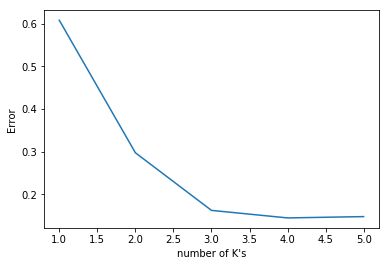

In [84]:
k(df_final,'EuclideanDist','price',97)
# df_final = cleaned Dataframe
# 'EuclideanDist' = Computed Euclidean Distance Column in df_final
# 'price' to predict in df_final
# '97' = actua; value of predicted price

In [ ]:
# error = (real - predicted) / real
# Accuracy =  1 - error

In [83]:
z[0]

1.4142135623730951

In [86]:
df_final

,bathrooms,bedrooms,beds,DC,MD,NY,VA,Washington DC,EuclideanDist,price
8,1.5,1.0,1.0,0,1,0,0,0,1.414214,38.0
2,2.0,1.0,1.0,0,1,0,0,0,1.500000,50.0
4,1.0,1.0,1.0,0,1,0,0,0,1.500000,50.0
6,2.0,2.0,2.0,1,0,0,0,0,1.500000,100.0
7,1.0,1.0,1.0,0,1,0,0,0,1.500000,100.0
9,1.0,1.0,1.0,0,1,0,0,0,1.500000,71.0
0,1.0,1.0,2.0,1,0,0,0,0,1.802776,160.0
3,1.0,1.0,1.0,1,0,0,0,0,2.061553,95.0
1,3.0,3.0,3.0,1,0,0,0,0,2.500000,350.0
5,1.0,2.0,4.0,1,0,0,0,0,2.500000,99.0
